In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
data = pd.read_csv('imdb_top_250.csv')

In [4]:
data.head()

,name,year,director,actors,rating,no_of_votes,imdb_link
0,The Shawshank Redemption,1994,Frank Darabont,"Tim Robbins, Morgan Freeman",9.2,1710495.0,/title/tt0111161/
1,The Godfather,1972,Francis Ford Coppola,"Marlon Brando, Al Pacino",9.2,1169281.0,/title/tt0068646/
2,The Godfather: Part II,1974,Francis Ford Coppola,"Al Pacino, Robert De Niro",9.0,800914.0,/title/tt0071562/
3,The Dark Knight,2008,Christopher Nolan,"Christian Bale, Heath Ledger",8.9,1697321.0,/title/tt0468569/
4,12 Angry Men,1957,Sidney Lumet,"Henry Fonda, Lee J. Cobb",8.9,454688.0,/title/tt0050083/


In [10]:
data[data.rating > 8.9]

,name,year,director,actors,rating,no_of_votes,imdb_link
0,The Shawshank Redemption,1994,Frank Darabont,"Tim Robbins, Morgan Freeman",9.2,1710495.0,/title/tt0111161/
1,The Godfather,1972,Francis Ford Coppola,"Marlon Brando, Al Pacino",9.2,1169281.0,/title/tt0068646/
2,The Godfather: Part II,1974,Francis Ford Coppola,"Al Pacino, Robert De Niro",9.0,800914.0,/title/tt0071562/


The pandas `describe` function provides some basic statistics for all numerical columns

In [23]:
data[['year', 'rating', 'no_of_votes']].describe()

,year,rating,no_of_votes
count,250.000000,250.000000,2.500000e+02
mean,1984.148000,8.256400,4.111479e+05
std,24.323912,0.239098,3.382888e+05
min,1921.000000,8.000000,2.595200e+04
25%,1964.250000,8.100000,1.215070e+05
50%,1991.000000,8.200000,3.295665e+05
75%,2004.000000,8.400000,6.053025e+05
max,2016.000000,9.200000,1.710495e+06


Let's try to get the avg rating for each director

In [8]:
group = data.groupby(by=data.director)

In [15]:
group.max()['rating'][:5]

director
Adam Elliot              8.1
Akira Kurosawa           8.6
Alejandro G. Iñárritu    8.1
Alfred Hitchcock         8.5
Andrei Tarkovsky         8.0
Name: rating, dtype: float64

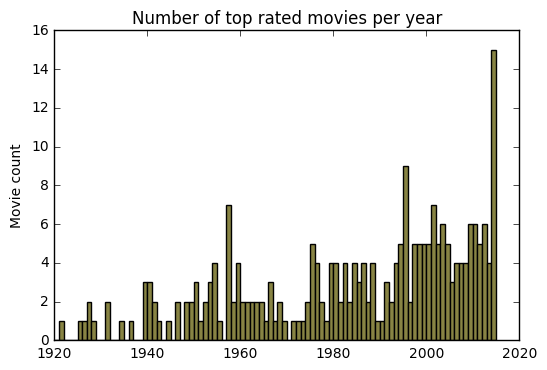

In [23]:
plt.hist(data.year, bins=range(1920, 2016), color='#888444')
plt.title('Number of top rated movies per year')
plt.ylabel('Movie count')
plt.show()

In [22]:
np.arange(1,20)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])

In [6]:
data[data.rating == data.rating.min()][['name', 'year', 'rating',]].head(6)

,name,year,rating
202,Stalker,1979,8.0
203,Annie Hall,1977,8.0
204,Salinui chueok,2003,8.0
205,Before Sunrise,1995,8.0
206,The Truman Show,1998,8.0
207,The Bourne Ultimatum,2007,8.0


In [50]:
decade = (data.year //10 ) * 10
data['decade'] = decade
data.head()

,name,year,director,actors,rating,no_of_votes,imdb_link,decade
0,The Shawshank Redemption,1994,Frank Darabont,"Tim Robbins, Morgan Freeman",9.2,1710495.0,/title/tt0111161/,1990
1,The Godfather,1972,Francis Ford Coppola,"Marlon Brando, Al Pacino",9.2,1169281.0,/title/tt0068646/,1970
2,The Godfather: Part II,1974,Francis Ford Coppola,"Al Pacino, Robert De Niro",9.0,800914.0,/title/tt0071562/,1970
3,The Dark Knight,2008,Christopher Nolan,"Christian Bale, Heath Ledger",8.9,1697321.0,/title/tt0468569/,2000
4,12 Angry Men,1957,Sidney Lumet,"Henry Fonda, Lee J. Cobb",8.9,454688.0,/title/tt0050083/,1950


Let's try grouping the movies based on the decade and see the average rating for each decade

In [41]:
decade_group = data.groupby(decade)

In [42]:
rating_decade = decade_group.rating.mean()
print rating_decade

year
1920    8.216667
1930    8.242857
1940    8.246154
1950    8.237037
1960    8.261111
1970    8.295238
1980    8.243333
1990    8.368293
2000    8.255102
2010    8.150000
Name: rating, dtype: float64


In [28]:
data.director.unique()

array(['Frank Darabont', 'Francis Ford Coppola', 'Christopher Nolan',
       'Sidney Lumet', 'Steven Spielberg', 'Quentin Tarantino',
       'Peter Jackson', 'Sergio Leone', 'David Fincher', 'Irvin Kershner',
       'Robert Zemeckis', 'Milos Forman', 'Martin Scorsese',
       'Lana Wachowski', 'Akira Kurosawa', 'George Lucas',
       'Fernando Meirelles', 'Jonathan Demme', 'Frank Capra',
       'Bryan Singer', 'Roberto Benigni', 'Luc Besson', 'Hayao Miyazaki',
       'Tony Kaye', 'Michael Curtiz', 'Alfred Hitchcock',
       'Charles Chaplin', 'Olivier Nakache', 'James Cameron',
       'Roman Polanski', 'Damien Chazelle', 'Ridley Scott', 'Roger Allers',
       'Stanley Kubrick', 'Billy Wilder',
       'Florian Henckel von Donnersmarck', 'Giuseppe Tornatore',
       'Isao Takahata', 'Andrew Stanton', 'Sam Mendes', 'Chan-wook Park',
       'Orson Welles', 'Wolfgang Petersen', 'Richard Marquand',
       'Fritz Lang', 'Mel Gibson', 'Jean-Pierre Jeunet',
       'Darren Aronofsky', 'David Lea

In [38]:
data.director.value_counts()[:10]

Alfred Hitchcock     7
Stanley Kubrick      7
Christopher Nolan    7
Martin Scorsese      7
Steven Spielberg     7
Hayao Miyazaki       6
Quentin Tarantino    5
Sergio Leone         5
Akira Kurosawa       5
Billy Wilder         5
Name: director, dtype: int64

In [29]:
temp = data.year.apply(lambda x: x+ 10)

                              name  year         director  \
94                         The Kid  1921  Charles Chaplin   
129                  The Gold Rush  1925  Charles Chaplin   
141                    The General  1926   Clyde Bruckman   
104                     Metropolis  1927       Fritz Lang   
142  Sunrise: A Song of Two Humans  1927      F.W. Murnau   

                              actors  rating  no_of_votes          imdb_link  
94   Charles Chaplin, Edna Purviance     8.3      68760.0  /title/tt0012349/  
129      Charles Chaplin, Mack Swain     8.2      68830.0  /title/tt0015864/  
141       Buster Keaton, Marion Mack     8.2      54309.0  /title/tt0017925/  
104       Brigitte Helm, Alfred Abel     8.2     113208.0  /title/tt0017136/  
142     George O'Brien, Janet Gaynor     8.2      29835.0  /title/tt0018455/  


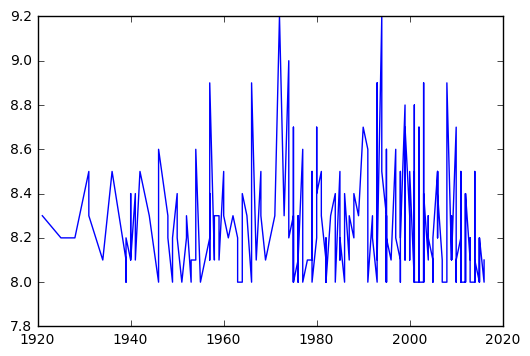

In [35]:
year_sort = data.sort_values(by='year')
print year_sort.head()
plt.plot(year_sort.year, year_sort.rating)
plt.show()

In [ ]:
year_sort = data.sort_values

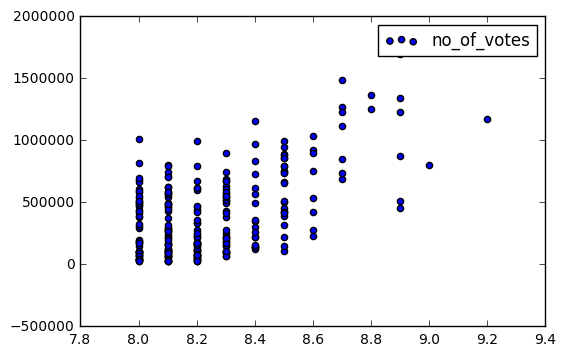

In [57]:
plt.scatter(year_sort.rating, year_sort.no_of_votes)
plt.legend()
plt.show()

In [55]:
data.head(2)

,name,year,director,actors,rating,no_of_votes,imdb_link,decade,rating_range
0,The Shawshank Redemption,1994,Frank Darabont,"Tim Robbins, Morgan Freeman",9.2,1710495.0,/title/tt0111161/,1990,9
1,The Godfather,1972,Francis Ford Coppola,"Marlon Brando, Al Pacino",9.2,1169281.0,/title/tt0068646/,1970,9


In [54]:
data['rating_range'] = data.rating.astype(int)

In [52]:
int(9.2)

9

In [56]:
pd.crosstab(data.rating_range, decade)

year,1920,1930,1940,1950,1960,1970,1980,1990,2000,2010
rating_range,,,,,,,,,,
8,6,7,13,27,18,19,30,40,49,38
9,0,0,0,0,0,2,0,1,0,0
